# BLACK FRIDAY DATASET EDA & FEATURE ENGINEERING


### cleaning and feature engineering for model training


In [1]:
import pandas as pd

In [2]:


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


## PROBLEM STATEMENT

A Retail company 'ABC private limited' wants to understand customer purchase behaviour
(specially purchase amount)against various categories in the products.They have shared purchase 
summary of various customers for selected high value product from  last month.
The dataset also contains customer demographics(age,gender,marital_status,city_type,stay_in_current_city)
product details (product_id and product category) and total purchase amount from last month.

Now they want to build a model to predict the purchase amount of customers against the selected 
products which will help them to create personalized offers for customer against different products.


In [3]:
#import the data set

df_train=pd.read_csv('D:/JOB/PYTHON/KRISH_NAIK/black_friday/train_ar.csv')
df_test=pd.read_csv('D:/JOB\PYTHON/KRISH_NAIK/black_friday/test_ar.csv')

In [4]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [6]:
##since we have to add more data to the same columns thus outer is used. 
##for columns added pd.merge(how='left') is to be used
df=pd.merge(df_test,df_train,how='outer' )
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0
783663,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0
783664,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0
783665,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0


In [7]:
## method 2 to to above 
## df_final=df_test.append(df_train)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
## access = 0 in drop means deleting file horizontally
## inplace= True will save the changes in both df_train and df_test


df.drop(['User_ID'],axis=1,inplace=True)

In [10]:
## check df_final,df_train,df_test

df
##df_test
##df_train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0
783663,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0
783664,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0
783665,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0


In [11]:
##data preprocessing :  removing categorical features such as Age ,gender,city_category

df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [12]:
##method 1 to remove categorical feature 

df['Gender']=df['Gender'].map({'F':0,'M':1})

df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,26-35,1,C,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368.0
783663,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371.0
783664,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137.0
783665,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365.0


In [13]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

##method 2 to handle categorical feature
'''df2=df_test.append(df_train)
df2['Gender']=pd.get_dummies(df2['Gender'],drop_first=1)'''


In [14]:
df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [15]:
'''categorical feature Age: not generally used because it will not help in relating with different problems
##as the processor will not be make any sense of it
##pd.get_dummies(df['Age'])'''

## method1:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})



In [16]:
x=pd.get_dummies(df['Age'])

In [17]:
df['Age'].head()

0    5
1    3
2    4
3    4
4    3
Name: Age, dtype: int64

In [18]:
x.head()

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN


In [20]:
'''# Import label encoder :method 3 to remove categorical feature Age
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])

df['Age'].unique()'''


"# Import label encoder :method 3 to remove categorical feature Age\nfrom sklearn import preprocessing\n\n# label_encoder object knows how to understand word labels.\nlabel_encoder = preprocessing.LabelEncoder()\n\n# Encode labels in column 'species'.\ndf['Age']= label_encoder.fit_transform(df['Age'])\n\ndf['Age'].unique()"

In [21]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN


In [22]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [23]:
df=pd.concat([df,df_city],axis=1)


In [24]:
df=df.drop('City_Category',axis=1)

In [25]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,NaN,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,NaN,NaN,0,1
2,P00288442,0,4,1,4+,1,5,14.0,NaN,NaN,1,0
3,P00145342,0,4,1,4+,1,4,9.0,NaN,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [26]:
##checking for missing values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### INFERENCES FROM ABOVE

1. There are null values in Product_Category_2,Product_Category_3 & purchase
2. lets check the null values compared to actual data
3. since purchase and product category are integral to customer spending thus we cannot drop them.
4. The missing values in purchase is due to missing value of test data so that should not be replaced.



<AxesSubplot:>

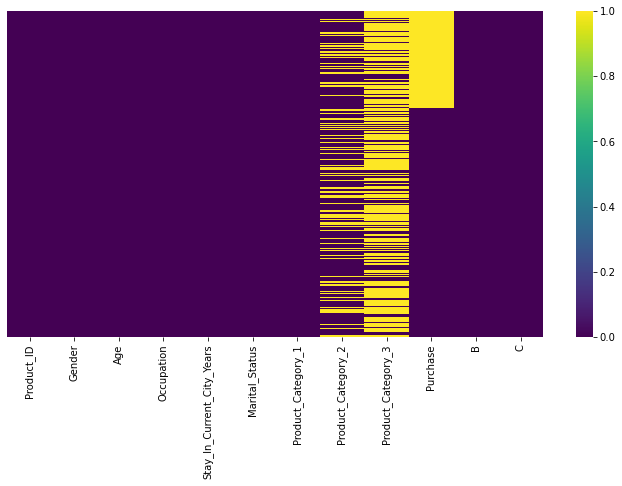

In [27]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [28]:
##REMOVING THE CATEGORICAL FEATURES OF 

df['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [29]:
##value count of all the values
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [30]:
## TO REMOVE NULL VALUES IN CATEGORICAL FEATURES WE REPLACE IT WITH MODE

df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [31]:
df['Product_Category_2'].mode()[0]


8.0

In [32]:
## REPLACING THE VALUE
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])


##checking whether vallue is replaced.
df['Product_Category_2'].isnull().sum()

0

In [33]:
## REPLACING THE MISSING VALUES IN Product_Category_3

df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

df['Product_Category_3'].isnull().sum()

0

<AxesSubplot:>

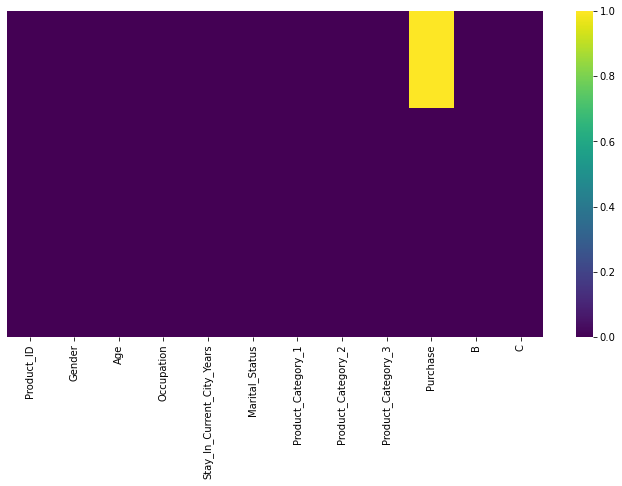

In [34]:
## representing the data after cleaning

sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4+,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4+,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [36]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [37]:
##convert categorical feature 

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4})

In [38]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


In [40]:
'''Suppose you have an object data type in any of the above categories  
converting object into integer is necessary to get relational database with the values

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)'''

"Suppose you have an object data type in any of the above categories  \nconverting object into integer is necessary to get relational database with the values\n\ndf['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)"

In [41]:
##converting b and c into int data type


df['B']=df['B'].astype(int)

df['C']=df['C'].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(6), object(1)
memory usage: 71.7+ MB


C:\Users\789456\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

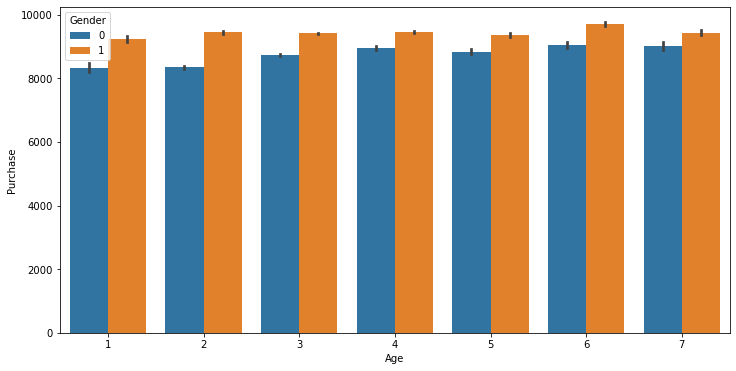

In [43]:
##Visualisation

sns.barplot(df['Age'],df['Purchase'],hue=df['Gender'])

## Observation
 
1. Amount spent on purchase is more in case of male
2. purchasing is relatively similar in all age groups


C:\Users\789456\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

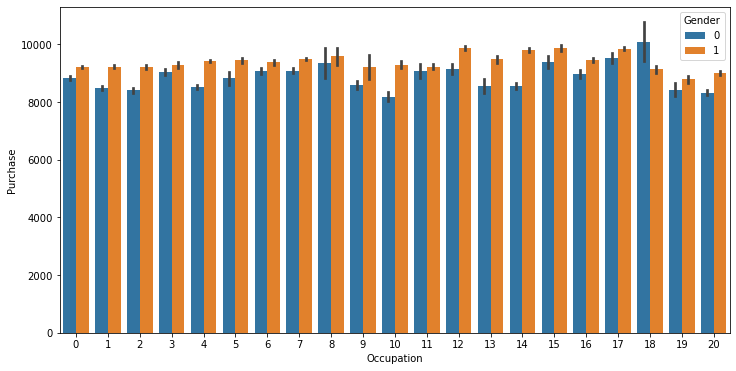

In [44]:
##visualization of purchase with occupation

sns.barplot(df['Occupation'],df['Purchase'],hue=df['Gender'])


C:\Users\789456\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

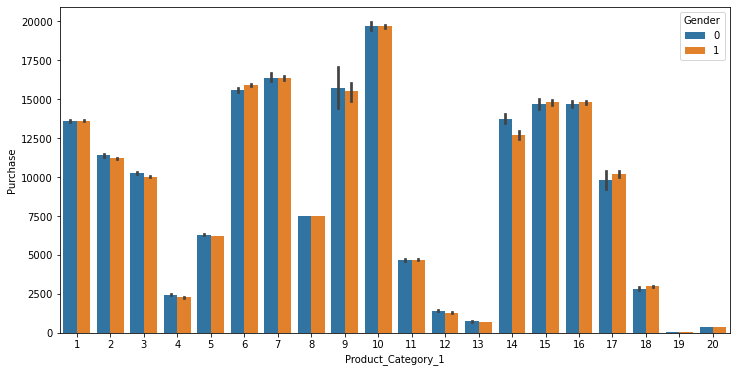

In [45]:
sns.barplot(df['Product_Category_1'],df['Purchase'],hue=df['Gender'])

C:\Users\789456\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

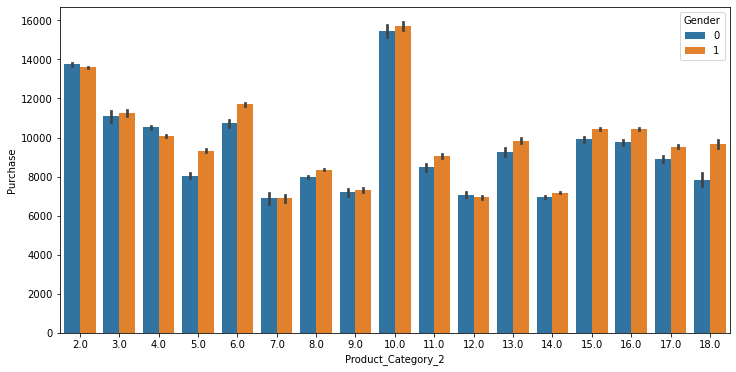

In [46]:
sns.barplot(df['Product_Category_2'],df['Purchase'],hue=df['Gender'])

C:\Users\789456\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

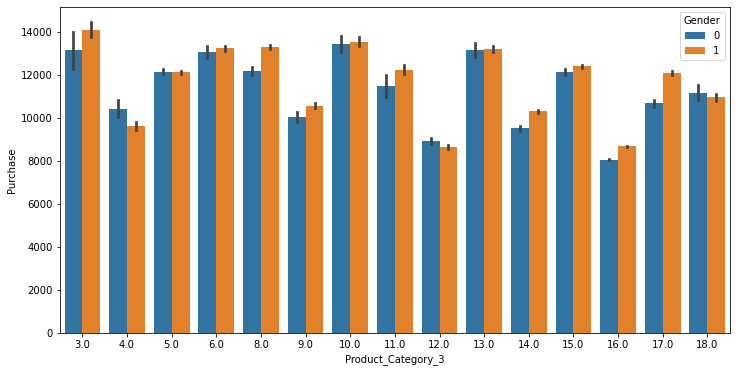

In [47]:
sns.barplot(df['Product_Category_3'],df['Purchase'],hue=df['Gender'])

In [48]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [49]:
df.drop('Product_ID',axis=1,inplace=True)

In [50]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [51]:
##feature scaling

df_test=df[df['Purchase'].isnull()]


In [52]:
df_train=df[~df['Purchase'].isnull()]

In [53]:
df_train.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
233599,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
233600,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


In [54]:
X=df_train.drop('Purchase',axis=1)

In [55]:

y=df_train['Purchase']

In [58]:
X.shape

(550068, 10)

In [60]:
y.shape

(550068,)

In [62]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42)


In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
##training the model

